In [1]:
import numpy as np
import pandas as pd
import datetime
import pytz
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from utils_segmentation import p3

np.random.seed(42)
import pickle
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
datestr = datetime.datetime.strftime(datetime.datetime.now(),'%Y%mm%d')

In [3]:
inputs = ['Rg', 'Tair', 'VPD','elevation',
       'azimuth', 'fssun', 'fsshd', 'frsun', 'frshd', 'fvsun', 'fvshd',
       'fwsun', 'fwshd', 'Tssun', 'Tsshd', 'Trsun', 'Trshd', 'Tvsun', 'Tvshd',
       'Twsun', 'Twshd'] 

In [4]:
datestr = datetime.datetime.strftime(datetime.datetime.now(),'%Y%mm%d')

In [5]:
daily_flux_cook=pd.read_csv('../../work/CookIRCamET/Working/cookhy2023_batches_processed.csv')
#daily_flux_cook_24=pd.read_csv('../../work/CookIRCamET/Working/cookhy2024_batches_processed.csv')
daily_flux_cprl=pd.read_csv('../../work/CookIRCamET/Working/cprlhy2023_batches_processed.csv')
#daily_flux_cook=pd.concat([daily_flux_cook_23,daily_flux_cook_24])

In [6]:
daily_flux = pd.concat([daily_flux_cook,daily_flux_cprl])

In [7]:
daily_flux.keys()

Index(['times', 'ET', 'Rg', 'Tair', 'rH', 'VPD', 'elevation', 'azimuth',
       'fssun', 'fsshd', 'frsun', 'frshd', 'fvsun', 'fvshd', 'fwsun', 'fwshd',
       'Tssun', 'Tsshd', 'Trsun', 'Trshd', 'Tvsun', 'Tvshd', 'Twsun', 'Twshd',
       'BadIR'],
      dtype='object')

In [8]:
daily_flux['DeltaTsshd'] = (daily_flux.Tair-daily_flux.Tsshd)*daily_flux.fsshd
daily_flux['DeltaTssun'] = (daily_flux.Tair-daily_flux.Tssun)*daily_flux.fssun

daily_flux['DeltaTvshd'] = (daily_flux.Tair-daily_flux.Tvshd)*daily_flux.fvshd
daily_flux['DeltaTvsun'] = (daily_flux.Tair-daily_flux.Tvsun)*daily_flux.fvsun

daily_flux['DeltaTrshd'] = (daily_flux.Tair-daily_flux.Trshd)*daily_flux.frshd
daily_flux['DeltaTrsun'] = (daily_flux.Tair-daily_flux.Trsun)*daily_flux.frsun

daily_flux['DeltaTwshd'] = (daily_flux.Tair-daily_flux.Twshd)*daily_flux.fwshd
daily_flux['DeltaTwsun'] = (daily_flux.Tair-daily_flux.Twsun)*daily_flux.fwsun

In [9]:
daily_flux['DeltaVsshd'] = (daily_flux.VPD)*daily_flux.fsshd
daily_flux['DeltaVssun'] = (daily_flux.VPD)*daily_flux.fssun

daily_flux['DeltaVvshd'] = (daily_flux.VPD)*daily_flux.fvshd
daily_flux['DeltaVvsun'] = (daily_flux.VPD)*daily_flux.fvsun

daily_flux['DeltaVrshd'] = (daily_flux.VPD)*daily_flux.frshd
daily_flux['DeltaVrsun'] = (daily_flux.VPD)*daily_flux.frsun

daily_flux['DeltaVwshd'] = (daily_flux.VPD)*daily_flux.fwshd
daily_flux['DeltaVwsun'] = (daily_flux.VPD)*daily_flux.fwsun

In [10]:
daily_flux['Rsshd'] = (daily_flux.Rg)*daily_flux.fsshd
daily_flux['Rssun'] = (daily_flux.Rg)*daily_flux.fssun

daily_flux['Rvshd'] = (daily_flux.Rg)*daily_flux.fvshd
daily_flux['Rvsun'] = (daily_flux.Rg)*daily_flux.fvsun

daily_flux['Rrshd'] = (daily_flux.Rg)*daily_flux.frshd
daily_flux['Rrsun'] = (daily_flux.Rg)*daily_flux.frsun

daily_flux['Rwshd'] = (daily_flux.Rg)*daily_flux.fwshd
daily_flux['Rwsun'] = (daily_flux.Rg)*daily_flux.fwsun

In [11]:
inputs = daily_flux.keys()[-24:]

Fitting 10 folds for each of 64 candidates, totalling 640 fits


/project/nsaru/nsaru-cv/lib/python3.11/site-packages/pkg_resources/_vendor/pyparsing.py:87: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants
/project/nsaru/nsaru-cv/lib/python3.11/site-packages/pkg_resources/_vendor/pyparsing.py:87: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants
/project/nsaru/nsaru-cv/lib/python3.11/site-packages/pkg_resources/_vendor/pyparsing.py:87: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants
/project/nsaru/nsaru-cv/lib/python3.11/site-packages/pkg_resources/_vendor/pyparsing.py:87: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants
/project/nsaru/nsaru-cv/lib/python3.11/site-packages/pkg_resources/_vendor/pyparsing.py:87: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants
/project/nsaru/nsaru-cv/lib/python3.11/site-packages/pkg_resources/_vendor/pyparsing.py:87: DeprecationWarning: module 'sre_constants' is de

[CV 1/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 8, 2, 1);, score=0.574 total time=   1.9s
[CV 3/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 3, 2, 0);, score=nan total time=   0.0s
[CV 6/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 3, 2, 0);, score=nan total time=   0.0s
[CV 9/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 3, 2, 0);, score=nan total time=   0.0s
[CV 2/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 6/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 9/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 3/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 7/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 1/10] END clf__activation=tanh, clf__hidden_layer

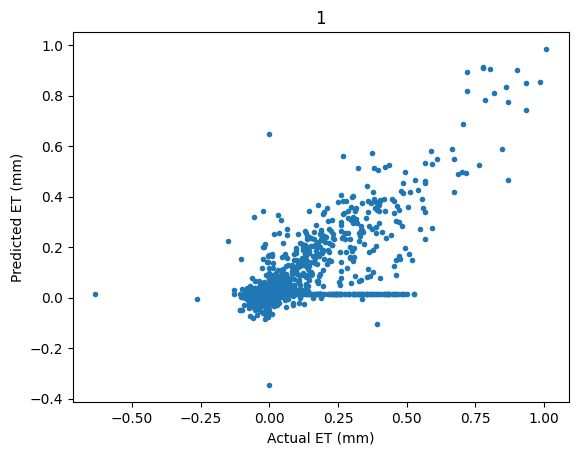

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV 7/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 8, 2, 1);, score=0.645 total time=   1.9s
[CV 1/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 5/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 1/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 5/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 9/10] END clf__activation=tanh, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 2/10] END clf__activation=tanh, clf__hidden_layer_sizes=(8, 3, 2, 1);, score=0.617 total time=   2.6s
[CV 7/10] END clf__activation=tanh, clf__hidden_layer_sizes=(3, 2, 1, 1);, score=0.012 total time=   1.7s
[CV 8/10] END clf__activation=tanh, clf__hidden_layer_sizes=(3, 2, 1, 1);, score=0.659 total 

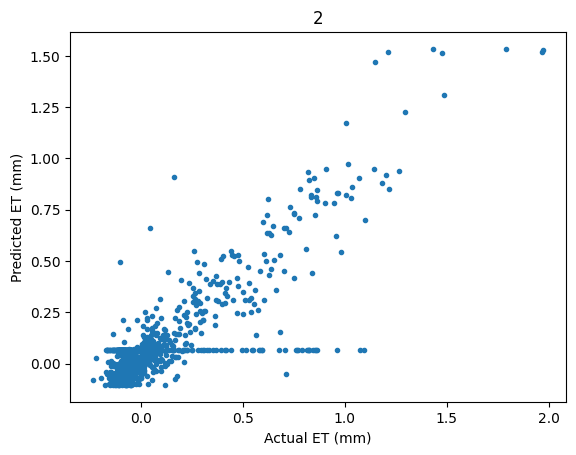

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV 5/10] END clf__activation=linear, clf__hidden_layer_sizes=(1, 0, 0, 0);, score=nan total time=   0.0s
[CV 10/10] END clf__activation=linear, clf__hidden_layer_sizes=(1, 0, 0, 0);, score=nan total time=   0.0s
[CV 7/10] END clf__activation=linear, clf__hidden_layer_sizes=(1, 0, 0, 0);, score=nan total time=   0.0s
[CV 3/10] END clf__activation=linear, clf__hidden_layer_sizes=(1, 0, 0, 0);, score=nan total time=   0.0s
[CV 6/10] END clf__activation=linear, clf__hidden_layer_sizes=(1, 0, 0, 0);, score=nan total time=   0.0s
[CV 1/10] END clf__activation=tanh, clf__hidden_layer_sizes=(48, 13, 3, 2);, score=0.741 total time=   3.0s
[CV 10/10] END clf__activation=tanh, clf__hidden_layer_sizes=(48, 13, 3, 2);, score=0.701 total time=   4.7s
[CV 1/10] END clf__activation=tanh, clf__hidden_layer_sizes=(16, 2, 1, 0);, score=nan total time=   0.0s
[CV 2/10] END clf__activation=tanh, clf__hidden_layer_sizes=(16, 2, 1, 0);, score=na

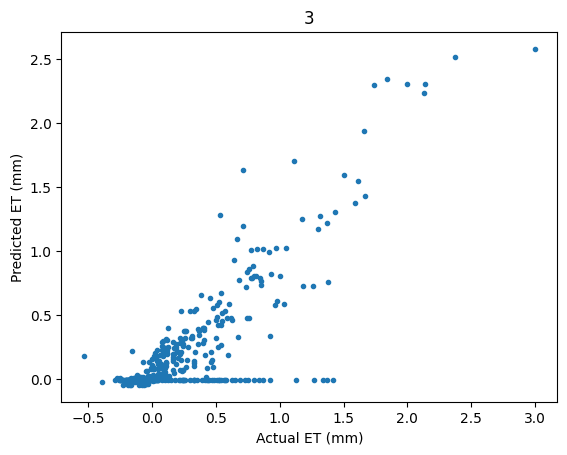

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV 9/10] END clf__activation=logistic, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 10/10] END clf__activation=logistic, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 1/10] END clf__activation=logistic, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 2/10] END clf__activation=logistic, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 3/10] END clf__activation=logistic, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 4/10] END clf__activation=logistic, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 5/10] END clf__activation=logistic, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 6/10] END clf__activation=logistic, clf__hidden_layer_sizes=(24, 1, 1, 0);, score=nan total time=   0.0s
[CV 7/10] END clf__activation=logistic, clf__hidden_layer_sizes=

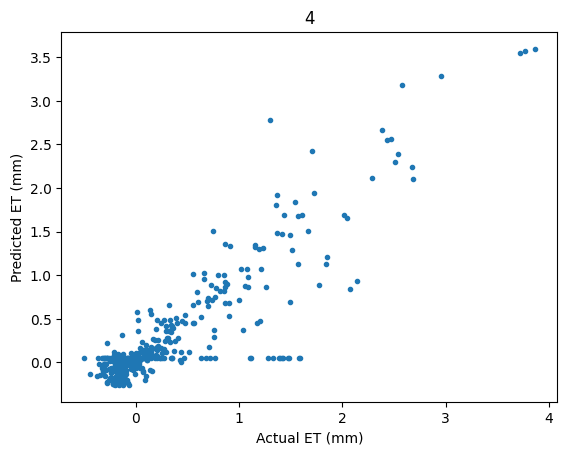

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV 6/10] END clf__activation=linear, clf__hidden_layer_sizes=(24, 3, 2, 1);, score=nan total time=   0.0s
[CV 5/10] END clf__activation=linear, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 6/10] END clf__activation=linear, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 7/10] END clf__activation=linear, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 8/10] END clf__activation=linear, clf__hidden_layer_sizes=(24, 2, 1, 0);, score=nan total time=   0.0s
[CV 5/10] END clf__activation=linear, clf__hidden_layer_sizes=(10, 4, 2, 3);, score=nan total time=   0.0s
[CV 6/10] END clf__activation=linear, clf__hidden_layer_sizes=(10, 4, 2, 3);, score=nan total time=   0.0s
[CV 7/10] END clf__activation=linear, clf__hidden_layer_sizes=(10, 4, 2, 3);, score=nan total time=   0.0s
[CV 8/10] END clf__activation=linear, clf__hidden_layer_sizes=(10, 4, 2, 3);, sco

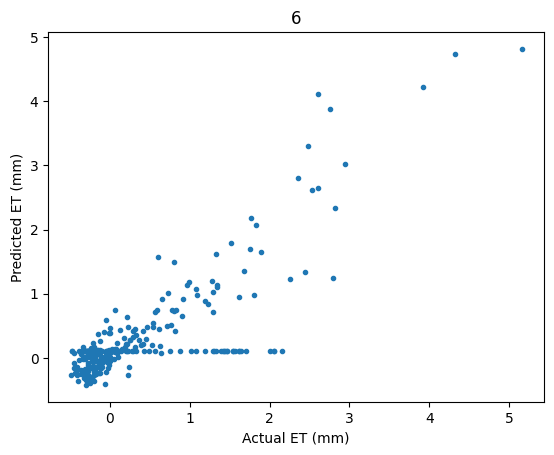

In [12]:
n_feats = len(inputs)
best_scores = []
for period_length in [1,2,3,4,6]:
    batched_flux = daily_flux[[*inputs]].values.reshape([-1,period_length*n_feats])
    batched_et = daily_flux[['ET']].values.reshape([-1,period_length])
    n_batches = batched_flux.shape[0]
    n_train = int(0.9*n_batches)
    n_test = n_batches-n_train
    batches = np.arange(n_batches)
    np.random.shuffle(batches)
    train = batches[0:n_train]
    test = batches[n_train:]
    batches_train_et,batches_train_feats = np.sum(batched_et[train,:],axis=1),batched_flux[train,0:period_length*n_feats] 
    batches_test_et,batches_test_feats =  np.sum(batched_et[test,:],axis=1),batched_flux[test,0:period_length*n_feats] 
    batches_train_et.shape
    
    #Pipeline
    #initial scaling
    scaler = StandardScaler()
    clf = MLPRegressor(max_iter=10000)
    #tune hyperparameters
    layers = []
    
    for layer1 in [1,3,7,21]:
        for layer2 in [1,3,6,18]:
            layer = (n_feats*period_length//layer1,int((n_feats*period_length//(layer2*layer1))**(2/3)),int((n_feats*period_length//(layer2*layer1))**(1/3)),period_length//layer2)
            layers.append(layer)
    
    parameters = {'clf__hidden_layer_sizes':layers,'clf__activation':['tanh','relu','logistic','linear']}
    pipeline = Pipeline(steps=[("scaler", scaler), ("clf", clf)])#
    
    search = GridSearchCV(pipeline, parameters,n_jobs=-1,cv=10,verbose=3)
    
    search.fit(batches_train_feats, batches_train_et)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
    filename = os.path.join(p3,'et_mlp_pipeline_'+str(period_length)+'_final.pk.sav')
    with open(filename, 'wb') as f:  # Python 3: open(..., 'wb'
        pickle.dump(search.best_estimator_, f)
    pred = search.predict(batches_test_feats)
    mlp = search.best_estimator_['clf']

    n_param = 0
    for i in range(4):
        n_param+=mlp.coefs_[i].shape[0]*mlp.coefs_[i].shape[0]
    
    best_scores.append([mean_squared_error(pred,batches_test_et)/period_length,
                        r2_score(pred,batches_test_et),period_length,n_param,n_train])
    plt.plot(batches_test_et,pred,'.')
    plt.title(str(period_length))
    plt.ylabel('Predicted ET (mm)')
    plt.xlabel('Actual ET (mm)')
    plt.show()

Text(0.5, 0, 'MSE (mm2)')

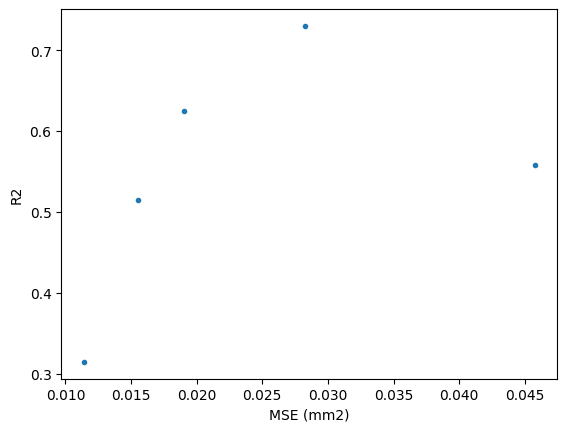

In [13]:
plt.plot(np.array(best_scores)[:,0],np.array(best_scores)[:,1],'.')
plt.ylabel('R2')
plt.xlabel('MSE (mm2)')

In [14]:
pd.DataFrame(np.array(best_scores),columns=['MSE (mm2)','R2','Period','n_params','n_train']).to_csv(p3+'/'+'mlp_results_'+datestr+'.csv')

[CV 1/10] END clf__activation=tanh, clf__hidden_layer_sizes=(20, 7, 2, 6);, score=0.465 total time=   2.4s
[CV 3/10] END clf__activation=tanh, clf__hidden_layer_sizes=(20, 7, 2, 6);, score=0.692 total time=   5.8s
[CV 7/10] END clf__activation=tanh, clf__hidden_layer_sizes=(20, 3, 1, 2);, score=0.642 total time=   4.1s
[CV 4/10] END clf__activation=tanh, clf__hidden_layer_sizes=(20, 2, 1, 1);, score=0.619 total time=   9.8s
[CV 6/10] END clf__activation=tanh, clf__hidden_layer_sizes=(6, 3, 1, 6);, score=0.646 total time=   5.3s
[CV 7/10] END clf__activation=tanh, clf__hidden_layer_sizes=(6, 1, 1, 2);, score=0.704 total time=   3.9s
[CV 2/10] END clf__activation=tanh, clf__hidden_layer_sizes=(6, 1, 1, 1);, score=0.383 total time=   9.8s
[CV 5/10] END clf__activation=relu, clf__hidden_layer_sizes=(144, 27, 5, 6);, score=0.707 total time=   5.2s
[CV 4/10] END clf__activation=relu, clf__hidden_layer_sizes=(144, 13, 3, 2);, score=0.720 total time=   4.5s
[CV 1/10] END clf__activation=relu, 